# Stock_Trend_Prediction.ipynb

This notebook demonstrates a complete pipeline for predicting and analyzing stock trends using multiple datasets including Tesla, PowerGrid, TCS, Netflix, and Zomato. The notebook covers:

1. Importing Libraries
2. Importing and Cleaning Datasets
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Data Splitting and Normalization
6. Model Development and Evaluation (LSTM example)
7. Project Ideas and Extensions


In [1]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime

## 2. Importing Datasets

We load five datasets assuming their files are named as follows:
- Tesla.csv
- powergrid.csv
- TCS.csv
- Netflix.csv
- zomato.csv

These are stored in a dictionary for easy access.

In [2]:
# Mapping tickers (or identifiers) to dataset file names
dataset_files = {
    "TESLA": "Tesla.csv",
    "POWERGRID": "powergrid.csv",
    "TCS": "TCS.csv",
    "NETFLIX": "Netflix.csv",
    "ZOMATO": "zomato.csv"
}

# Read all datasets into a dictionary
datasets = {ticker: pd.read_csv(fname) for ticker, fname in dataset_files.items()}

## 3. Data Cleaning

We perform the following steps on each dataset:
- Remove the first row (assumed to contain ticker names or extra header info).
- Convert numerical columns (`Adj Close`, `Close`, `High`, `Low`, `Open`, `Volume`) to float.
- Convert the `Date` column to a proper datetime format.
- Drop any rows with missing values.


In [3]:
def clean_stock_data(df):
    # Remove the first row if it contains non-data
    df = df.iloc[1:]
    # Strip extra spaces from column names
    df.columns = [col.strip() for col in df.columns]
    # Convert Date column
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # List of columns expected to be numeric
    num_cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
    # Convert numerical columns
    for col in num_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # Drop rows with missing data
    df.dropna(inplace=True)
    return df

# Clean every dataset in our dictionary
for ticker in datasets:
    datasets[ticker] = clean_stock_data(datasets[ticker])

C:\Users\moham\AppData\Local\Temp\ipykernel_9360\3697281015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\moham\AppData\Local\Temp\ipykernel_9360\3697281015.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
C:\Users\moham\AppData\Local\Temp\ipykernel_9360\3697281015.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

## 4. Exploratory Data Analysis (EDA)

In this section, we check for duplicates and plot the closing price trends for each dataset. We also generate a comparative plot for all datasets together.

TESLA: Duplicates = 0, Total records = 1692
POWERGRID: Duplicates = 0, Total records = 4208
TCS: Duplicates = 0, Total records = 4200
NETFLIX: Duplicates = 0, Total records = 1009
ZOMATO: Duplicates = 0, Total records = 631


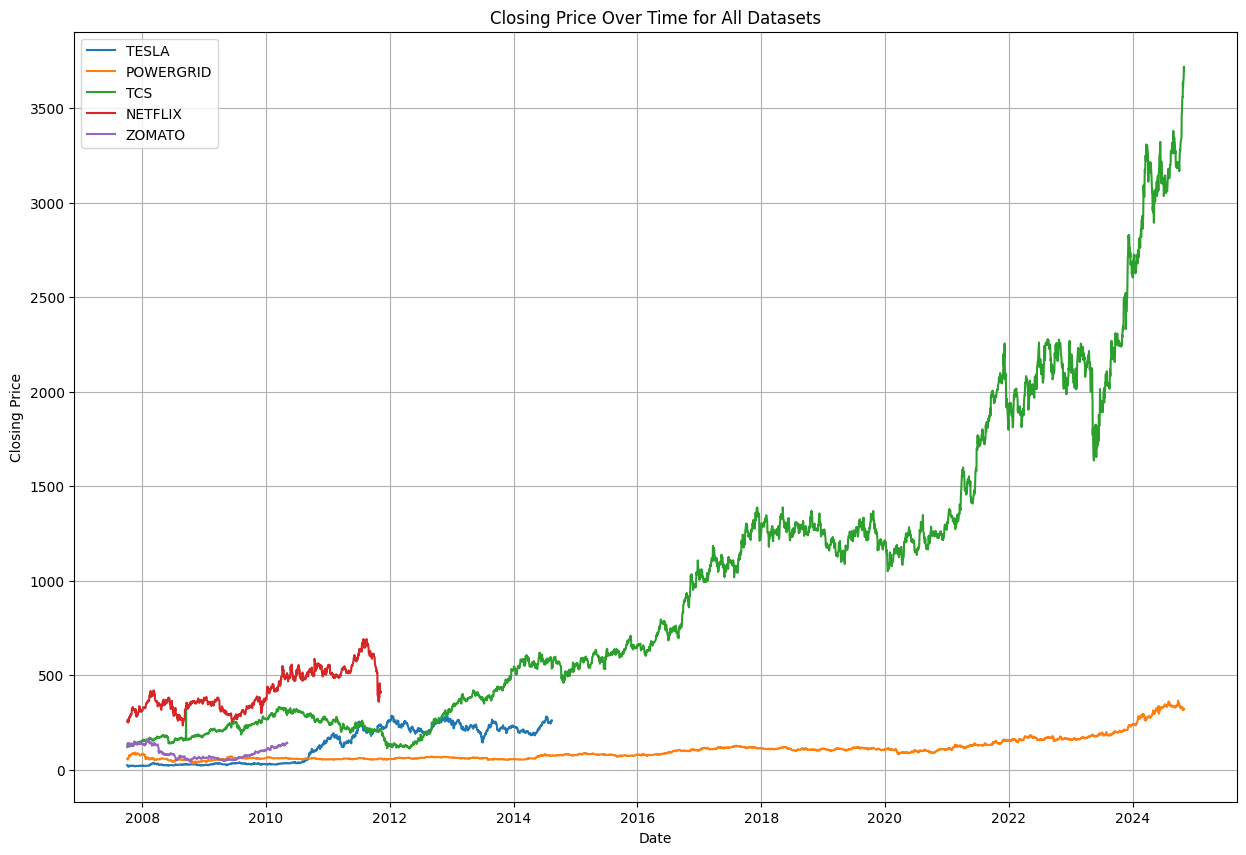

In [4]:
# Check for duplicates and print summary information for each dataset
for ticker, df in datasets.items():
    print(f"{ticker}: Duplicates = {df.duplicated().sum()}, Total records = {len(df)}")

# Plot each stock's closing price over time in one plot
plt.figure(figsize=(15, 10))
for ticker, df in datasets.items():
    plt.plot(df['Date'], df['Close'], label=ticker)
plt.title("Closing Price Over Time for All Datasets")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

## 5. Feature Engineering

We add basic date features such as Day, Month, and Year to potentially capture seasonal patterns.

In [5]:
def create_features(df):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    return df

for ticker in datasets:
    datasets[ticker] = create_features(datasets[ticker])

## 6. Data Splitting and Normalization (Example using TESLA)

We prepare the Tesla dataset for time series modeling using LSTM. This includes normalizing the data and creating sequences.

In [6]:
# Choose one dataset for the LSTM model (example: TESLA)
df_model = datasets["TESLA"]
data = df_model[['Close']].values

# Scale data to a [0, 1] range
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM: using a 60-day window
X = []
y = []
time_steps = 60
for i in range(time_steps, len(data_scaled)):
    X.append(data_scaled[i-time_steps:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # reshape for LSTM input

## 7. Model Development and Evaluation

We build a simple LSTM model to predict the closing price using historical data from Tesla.

Epoch 1/5


c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0861
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0016
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0014
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


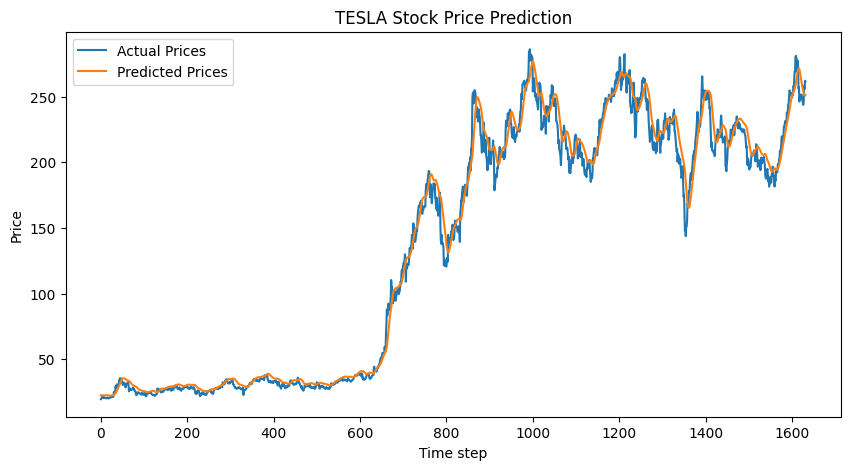

In [7]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (for demonstration, use a small number of epochs)
model.fit(X, y, epochs=5, batch_size=32)

# Generate predictions on the training data
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot prediction vs actual closing prices
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time step')
plt.ylabel('Price')
plt.legend()
plt.show()

## 8. Project Ideas and Extensions

- **Stock Price Prediction:** Experiment with additional models such as ARIMA or Prophet for improved forecasts.
- **Volatility Analysis:** Analyze the volatility of each stock with additional statistical metrics.
- **Correlation Analysis:** Compare performance trends across different stocks to uncover relationships.
- **Multi-dataset Integration:** Combine insights across these datasets for a broader market analysis.